In [7]:
# IMPORTS
import os, sys
from os.path import join, dirname, isdir, isfile, basename
from time import strftime

SRC_PATH  = os.path.split(os.getcwd())[0]
if(not(SRC_PATH in sys.path)):
    sys.path.append(SRC_PATH)
CLASSIFIER_PATH = join(SRC_PATH,"model_classifier")
if(not(CLASSIFIER_PATH in sys.path)):
    sys.path.append(CLASSIFIER_PATH)
BOW_PATH = join(SRC_PATH,"bow_classifier")
if(not(BOW_PATH in sys.path)):
    sys.path.append(BOW_PATH)
DATA_PATH = "/home/kai/Workspace/deep_doc_class/deep_doc_class/data"
    
from bow_classifier import *
from classify import *
from Random_Forest import Random_Forest
from Logistic_Regression import Logistic_Regression

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
from sklearn.tree import export_graphviz

import matplotlib.pyplot as plt
import itertools
import re, json, csv

import pydotplus 
from IPython.display import Image

In [2]:
# EXTRACT DATA
# setup feature extractor with pathes to all data
fe = setup_feature_extractor()

# load doc_ids with their classification
train_ids_path = join(DATA_PATH,"training_data.csv")
test_ids_path = join(DATA_PATH,"test_data.csv")
with open(train_ids_path, 'r') as tr, open(test_ids_path, 'r') as te:
    tr_r = csv.reader(tr)
    train_input = list(tr_r)
    te_r = csv.reader(te)
    test_input = list(te_r)
train_ids, train_labels = zip(*train_input)
    
# create vectorizer and classifier
bow_vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w\w\w+\b|©', min_df=1)
kwargs = {"penalty":'l2', "C":100, "fit_intercept":True, "intercept_scaling":1, "class_weight":"balanced",
          "solver":"liblinear", "max_iter":10, "tol":0.01}
bow_classifier = LogisticRegression(**kwargs)

# let the feature extractor train the bow classifiers on the train data only
for bc in fe.bow_classifiers:
    clean_train_data = bc.load_clean_data(list(train_ids))
    bc.fit_vectorizer(bow_vectorizer, clean_train_data, save_path=None)
    clean_num_data = bc.vectorizer.transform(clean_train_data)
    bc.train_classifier(bow_classifier, clean_num_data, np.array(train_labels), save_path=None)

c_date = str(strftime("%Y_%m_%d"))
c_date = ""
train_data_path = join(DATA_PATH,"feature_values","train_"+c_date+"_no_xml_err.csv")
test_data_path = join(DATA_PATH,"feature_values","test_"+c_date+"_no_xml_err.csv")
#  extract training and testing data
fe.extract_features(doc_input=train_input ,feature_file=train_data_path)
fe.extract_features(doc_input=test_input ,feature_file=test_data_path)

No csv metadata: 11d5faff7426af3c6461037068af4990!!!
No csv metadata: 3874bf355ce43809835e9ed90662a485!!!
No csv metadata: 3ffb37cb63d09a9d3d2362fb715262a9!!!
No csv metadata: dfabaca4caab2eb3f5c35375ff5e49e3!!!


In [168]:
# LOAD DATA
c_date = str(strftime("%Y_%m_%d"))
#c_date = "2017_06_11"
train_data_path = join(DATA_PATH,"feature_values","train"+c_date+"_no_xml_err.csv")
test_data_path = join(DATA_PATH,"feature_values","test"+c_date+"_no_xml_err.csv")

train_data, train_labels, train_docs, column_names = load_data(train_data_path, norm=False)
test_data, test_labels, test_docs, column_names = load_data(test_data_path, norm=False)

man_class_file = join(DATA_PATH,"new_clean_manual_class_with_train.csv")
man_class = pd.read_csv(man_class_file, delimiter=',', header=0, quoting=1)

train_data = train_data[:,8:]
test_data = test_data[:,8:]
column_names = column_names[8:]
print(column_names)

['count_outline_items', 'count_fonts', 'count_font_colors', 'count_font_families', 'max_font_size', 'min_font_size', 'main_font_size', 'perc_main_font_word', 'count_images', 'total_image_space', 'dev_image_space_pp', 'max_image_space_pp', 'min_image_space_pp', 'biggest_image', 'samllest_image', 'count_words', 'count_bold_words', 'count_annotations', 'count_lines', 'count_textboxes', 'count_blockstyles', 'dev_words_pp', 'dev_lines_pp', 'dev_textboxes_pp', 'dev_blockstyles_pp', 'dev_textbox_space_pp', 'dev_blockstyle_space_pp', 'max_words_pp', 'max_lines_pp', 'max_textboxes_pp', 'max_blockstyles_pp', 'max_textbox_space_pp', 'max_blockstyle_space_pp', 'min_words_pp', 'min_lines_pp', 'min_textboxes_pp', 'min_blockstyles_pp', 'min_textbox_space_pp', 'min_blockstyle_space_pp', 'mean_words_per_line', 'dev_words_per_line', 'mean_lines_per_blockstyle', 'dev_lines_per_blockstyle', 'max_lines_per_blockstyle', 'modal_right', 'perc_modal_right', 'max_right', 'modal_left', 'perc_modal_left', 'max_le

In [176]:
print(column_names[20])
high_blockstyle_cnts = [train_docs[i] for i in range(len(train_data)) if(train_data[i,21]>10)]
for d_id in high_blockstyle_cnts:
    print(list(man_class[man_class["doc_id"]==d_id][["category","doc_id"]]))

count_blockstyles
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'do

['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category'

['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category'

['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category'

['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category'

['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category', 'doc_id']
['category'

In [167]:
img = 0
for i in range(0,len(train_data[0]),5):
    c_data = train_data[:,i:min(len(train_data[0]),i+5)]
    c_columns = column_names[i:min(len(train_data[0]),i+5)]
    create_boxplot(c_data, c_columns, "/home/kai/Downloads/bp%d.png"%(img,))
    img += 1

In [162]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=15, min_samples_split=2,
                       min_samples_leaf=40, min_weight_fraction_leaf=0.0,
                       max_features=len(train_data[0]),random_state=None, max_leaf_nodes=None,
                       min_impurity_split=1e-07, class_weight=None, presort=False)

In [163]:
# LOGISTIC REGRESSION
kwargs = {"penalty":'l2', "C":10, "fit_intercept":True, "intercept_scaling":1, "class_weight":"balanced",
          "solver":"liblinear", "max_iter":1000, "tol":0.01}
lr = LogisticRegression(**kwargs)

In [164]:
# FOREST
kwargs = {"n_estimators":1000, "criterion":'entropy', "max_depth":30, "min_samples_split":2,
          "min_samples_leaf":5, "min_weight_fraction_leaf":0.0, "max_features":None,
          "max_leaf_nodes":None, "min_impurity_split":1e-07, "bootstrap":True,
          "oob_score":False, "n_jobs":4, "random_state":None, "verbose":0, "warm_start":False,
          "class_weight":"balanced"}
rf = RandomForestClassifier(**kwargs)

train_acc: 0.933
total: 500
copyright: 151
not_protected: 349
auc_roc: 0.837
auc_pr: 0.506
acc: 0.864
f1: 0.773
precision: 0.779
recall: 0.768


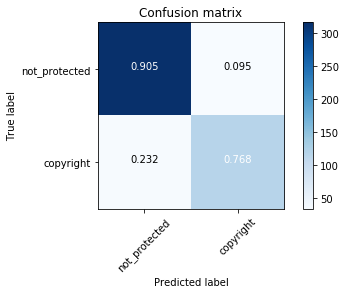

In [165]:
# CLASSIFY
classifier = dt
classifier.fit(train_data, train_labels)

#classifier.model = joblib.load(join(BOW_PATH,"custom_log_reg",bc.name+".pkl"))

probs = classifier.predict_proba(train_data)[:,1]
preds = probs>0.5

print("train_acc: %.3f"%(accuracy_score(train_labels,preds),))

probs = classifier.predict_proba(test_data)[:,1]
preds = probs>0.5

print("total: %d"%(len(test_labels),))
print("copyright: %d"%(np.sum(test_labels),))
print("not_protected: %d"%(np.sum(test_labels==0),))

fpr, tpr, thresholds = roc_curve(test_labels, preds)
precision, recall, thresholds = precision_recall_curve(test_labels, preds)

print("auc_roc: %.3f"%(auc(fpr, tpr),))
print("auc_pr: %.3f"%(auc(precision, recall),))
print("acc: %.3f"%(accuracy_score(test_labels,preds),))
print("f1: %.3f"%(f1_score(test_labels,preds),))
print("precision: %.3f"%(precision_score(test_labels,preds),))
print("recall: %.3f"%(recall_score(test_labels,preds),))
plot_confusion_matrix(confusion_matrix(test_labels,preds),["not_protected","copyright"],True)

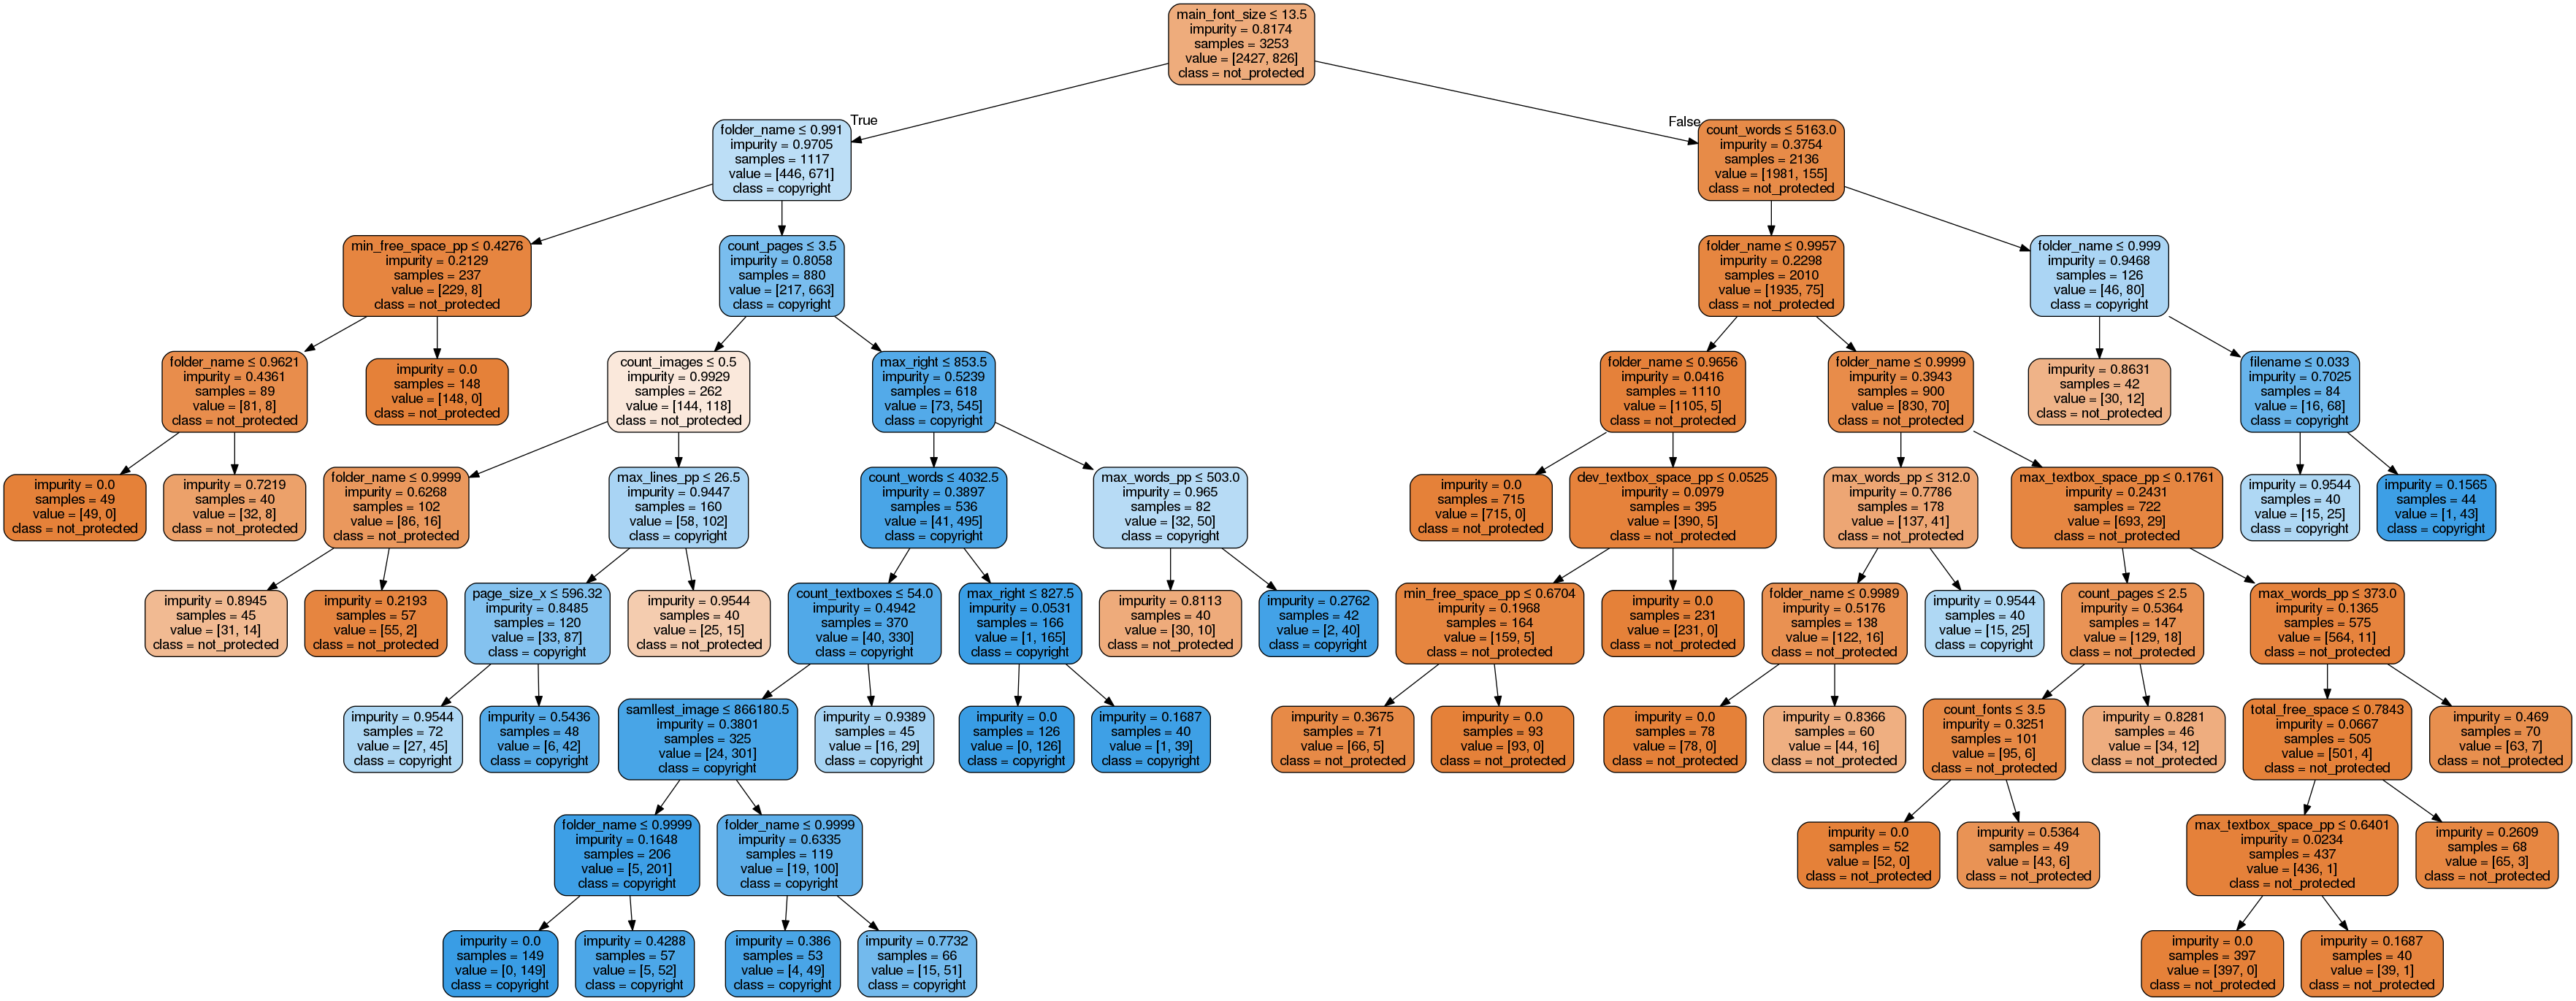

In [166]:
tree = classifier.tree_
dot_data = export_graphviz(tree, out_file=None, 
                         feature_names=column_names,  
                         class_names=["not_protected", "copyright"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  